## Ex 4: An isothermal atmosphere model

In [35]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe
from numpy import max, linspace, exp

# Constants
G = 6.67e-11  # Gravitational constant
earth = GravBody.earth()  # Earth as an object with mass and radius
gravity = 9.81  # simple gravity

# Initial Conditions
x0 = 0  # start position
vx0 = 850  # start vertical speed
t_num = 100_000  # number of steps in trajectory

We are going to compute density as function of altitude like follows:
$$\rho(h)=\rho_{surface}*exp(-h/H)$$
Where, $\rho_{surface}$ and $H$ are respectively, the density at sea-level and the Earth's scale-height.

In [36]:
def atmosphere(h):
    surfacedens=1.217
    scaleheight=8500
    return surfacedens*exp(-h/scaleheight)

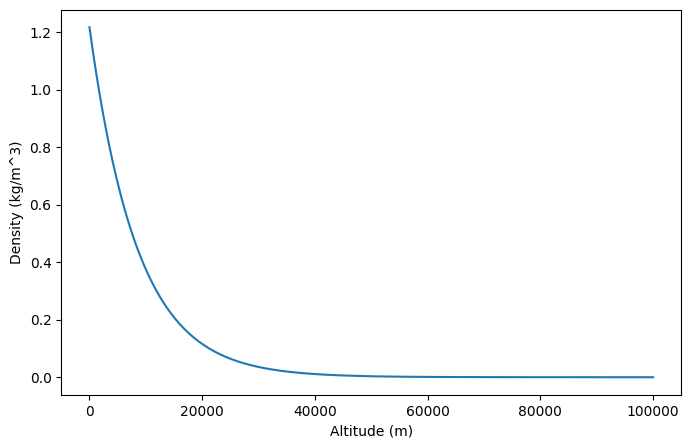

In [37]:
h = linspace(0, 100_000, 5000)  # linearly separated time steps
rho = atmosphere(h)

plt.figure(figsize=(8, 5))  # create figure, figsize can be changed as preferred
plt.plot(h, rho)  # plot time against height
plt.xlabel('Altitude (m)')
plt.ylabel('Density (kg/m^3)')
plt.show()  # make plot appear

In [38]:
def projectile(t, posvel):
    cd=1.0
    A=0.01
    mass=1.0

    current_gravity = G * earth.mass / (earth.radius + posvel[0])**2
    drag_force = -0.5 * cd * A * atmosphere(posvel[0]) * abs(posvel[1]) * posvel[1]

    return posvel[1], -current_gravity + drag_force / mass

# Running Solver
t_final = 50  # time of trajectory given
probe = Probe(projectile, t_final, t_num, x0=x0, vx0=vx0, event=0)  # probe as an object
t, posvel = probe.odesolve()  # solve the differential equations
t_end = len(t) - 2
max(posvel, axis=0)[0]

512.8527377153681

In [39]:
t[t_end]

21.80271802718027

As we can see, with not uniform density our projectile is going a bit higher than previously. This is because at high altitude (apoapsis) the drag is reduce due to a lower air density. Of course, this effect should be more important with higher apoapsis. If the flare was launch with a higher initial vertical speed. Because, as show above the density curve is not straight and above 40km the density of the atmosphere is nearly zero creating very limited to zero drag force allowing the flare to go higher and to achieve faster speed at return.

Finally, to validate our result we can check that we are close to the ground at end of simulation.

In [40]:
posvel[t_end][0]

0.01016905735843121